In [57]:
library(readxl)

In [58]:
library(dplyr)

In [59]:
library(caTools)

In [72]:
#install required packages
install.packages('gmodels')
#import required library 
library(gmodels)

also installing the dependency 'gdata'



package 'gdata' successfully unpacked and MD5 sums checked
package 'gmodels' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\Rtmp42C6P9\downloaded_packages


Warning message:
"package 'gmodels' was built under R version 3.6.3"

In [6]:
dataset_happy_dmkm<-read_excel("dataset_happy_dmkm.xlsx")
data_happy<-dataset_happy_dmkm
head(data_happy)

D,X1,X2,X3,X4,X5,X6
0,3,3,3,4,2,4
0,3,2,3,5,4,3
1,5,3,3,3,3,5
0,5,4,3,3,3,5
0,5,4,3,3,3,5
1,5,5,3,5,5,5


In [4]:
#Pengecekan Missing Value
#Jika false, data tidak terdapat missing value.
#Jika true, data perlu dilakukan cleaning

any(is.na(data_happy))

[1] FALSE

In [21]:
count(data_happy,D)

D,n
0,66
1,77


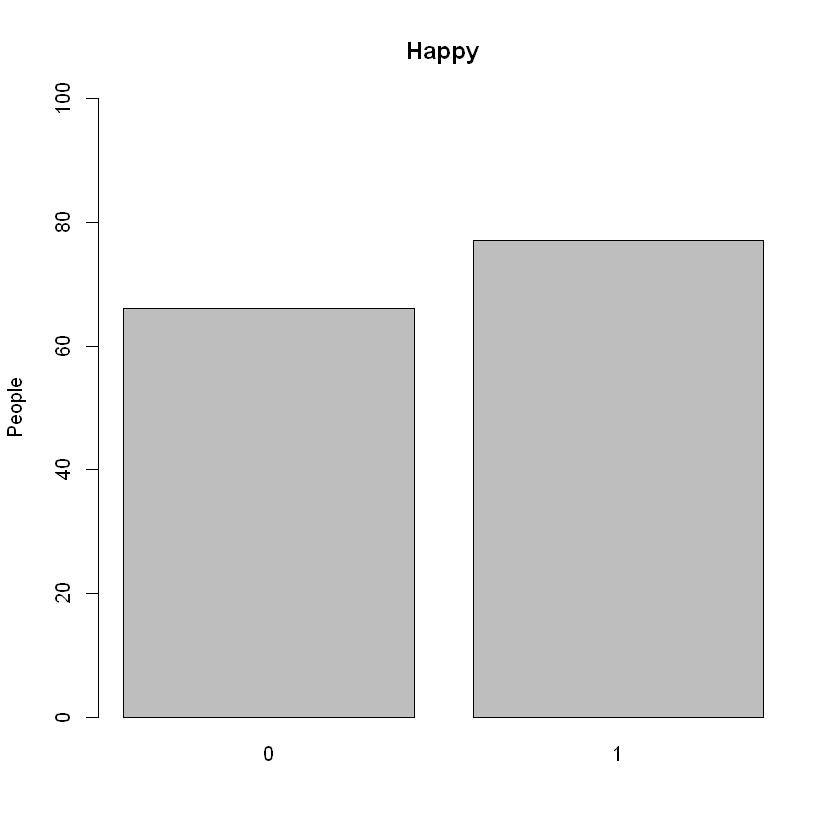

In [26]:
#Mengecek apakah data imbalance atau tidak

counts <- table(data_happy$D)
barplot(counts, main="Happy",
   ylab="People",
   ylim=c(0,100))

In [ ]:
#Mengubah jenis atribut menjadi faktor

data_happy$D=factor(data_happy$D)
data_happy$X1=factor(data_happy$X1)
data_happy$X2=factor(data_happy$X2)
data_happy$X3=factor(data_happy$X3)
data_happy$X4=factor(data_happy$X4)
data_happy$X5=factor(data_happy$X5)
data_happy$X6=factor(data_happy$X6)

In [50]:
#Membagi dataset menjadi data training dan data testing

set.seed(101)
split=sample.split(data_happy$D, SplitRatio=0.8)
train_set=subset(data_happy, split==TRUE)
test_set=subset(data_happy, split==FALSE)
print(paste("Jumlah Training Set", nrow(train_set), "| Jumlah Testing Set: ",
           nrow(test_set)))

[1] "Jumlah Training Set 115 | Jumlah Testing Set:  28"


In [51]:
#Membuat model regresi

model_happy=glm(formula=D~., family=binomial(link="logit"), data=train_set)
summary(model_happy)
coef(model_happy)


Call:
glm(formula = D ~ ., family = binomial(link = "logit"), data = train_set)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6202  -1.1580   0.7889   1.0025   1.6311  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)   
(Intercept) -3.844279   1.466728  -2.621  0.00877 **
X1           0.511332   0.288106   1.775  0.07593 . 
X2          -0.011952   0.177807  -0.067  0.94641   
X3           0.089092   0.219743   0.405  0.68516   
X4           0.002948   0.235420   0.013  0.99001   
X5           0.086556   0.191113   0.453  0.65062   
X6           0.292438   0.269886   1.084  0.27856   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 158.72  on 114  degrees of freedom
Residual deviance: 147.83  on 108  degrees of freedom
AIC: 161.83

Number of Fisher Scoring iterations: 4


(Intercept)          X1          X2          X3          X4          X5 
-3.84427864  0.51133209 -0.01195238  0.08909210  0.00294770  0.08655616 
         X6 
 0.29243780

In [52]:
#Evaluasi Model

evaluasi=predict(model_happy, newdata=test_set, type='response')
hasil=ifelse(evaluasi>0.05,1.0)
print(evaluasi)

        1         2         3         4         5         6         7         8 
0.6987063 0.7220301 0.4228108 0.7055887 0.5153152 0.2627843 0.5653093 0.7005986 
        9        10        11        12        13        14        15        16 
0.6456329 0.4235304 0.4469809 0.6127224 0.4684618 0.5231269 0.4243560 0.7325872 
       17        18        19        20        21        22        23        24 
0.4678304 0.3451108 0.5153152 0.5944700 0.3452039 0.6652693 0.7366727 0.7418485 
       25        26        27        28 
0.5476257 0.6611910 0.6822227 0.5628344 


In [74]:
#Confusion Matrix
table(test_set$D, evaluasi>0.5)
CrossTable(test_set$D, evaluasi>0.5)

   
    FALSE TRUE
  0     7    6
  1     2   13


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  28 

 
             | evaluasi > 0.5 
  test_set$D |     FALSE |      TRUE | Row Total | 
-------------|-----------|-----------|-----------|
           0 |         7 |         6 |        13 | 
             |     1.905 |     0.902 |           | 
             |     0.538 |     0.462 |     0.464 | 
             |     0.778 |     0.316 |           | 
             |     0.250 |     0.214 |           | 
-------------|-----------|-----------|-----------|
           1 |         2 |        13 |        15 | 
             |     1.651 |     0.782 |           | 
             |     0.133 |     0.867 |     0.536 | 
             |     0.222 |     0.684 |           | 
             |     0.071 |     0.464 |           | 
-------------|-----------|-----------|-